# Case

**Business Problem:** FLO, an online shoe store, wants to segment its customers and determine marketing strategies according to these segments. To this end, customer behaviors will be defined and groups will be created according to clusters in these behaviors.

The dataset consists of information obtained from the past shopping behavior of customers who made their last purchases from Flo as OmniChannel (both online and offline shopping) in 2020 - 2021.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv("/kaggle/input/flocrm/flo_data_20k.csv")
pd.set_option('display.max_columns', None)
df_=df.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


# Preparing Data

In [2]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Duplicated Values #####################")
    print(dataframe.duplicated().sum())
    print("##################### Missing Values #####################")
    print(dataframe.isnull().sum())
    print("##################### Number of Unique Values #####################")
    print(df.nunique())
    
check_df(df)

##################### Shape #####################
(19945, 12)
##################### Types #####################
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
##################### Duplicated Values #####################
0
##################### Missing Values #####################
master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_

In [3]:
df["order_num_total_ever_online"]=df["order_num_total_ever_online"].astype(int)
df["order_num_total_ever_offline"]=df["order_num_total_ever_offline"].astype(int)
df["first_order_date"]=pd.to_datetime(df["first_order_date"])
df["last_order_date"]=pd.to_datetime(df["last_order_date"])
df["last_order_date_online"]=pd.to_datetime(df["last_order_date_online"])
df["last_order_date_offline"]=pd.to_datetime(df["last_order_date_offline"])

df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                   int64
order_num_total_ever_offline                  int64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
dtype: object

In [4]:
df["total_shopping_count"]= df["order_num_total_ever_online"]+df["order_num_total_ever_offline"]
df["total_shopping_bill"]=df["customer_value_total_ever_offline"]+df["customer_value_total_ever_online"]
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_shopping_count,total_shopping_bill
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4,1,139.99,799.38,[KADIN],5,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19,2,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3,2,189.97,395.35,"[ERKEK, KADIN]",5,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1,1,39.99,81.98,"[AKTIFCOCUK, COCUK]",2,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1,1,49.99,159.99,[AKTIFSPOR],2,209.98


In [5]:
# Top 10 customers who brought in the most profit

df.groupby("master_id").agg({"total_shopping_bill":"sum"}).sort_values("total_shopping_bill", ascending=False).reset_index().head(10)

,master_id,total_shopping_bill
0,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
1,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
2,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
3,7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
4,47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34
5,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57
6,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57
7,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10
8,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24
9,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,12103.15


In [6]:
# Top 10 customers who placed the most orders

df.groupby("master_id").agg({"total_shopping_count":"sum"}).sort_values("total_shopping_count", ascending=False).reset_index().head(10)

,master_id,total_shopping_count
0,5d1c466a-9cfd-11e9-9897-000d3a38a36f,202
1,cba59206-9dd1-11e9-9897-000d3a38a36f,131
2,a57f4302-b1a8-11e9-89fa-000d3a38a36f,111
3,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88
4,329968c6-a0e2-11e9-a2fc-000d3a38a36f,83
5,73fd19aa-9e37-11e9-9897-000d3a38a36f,82
6,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77
7,b27e241a-a901-11e9-a2fc-000d3a38a36f,75
8,d696c654-2633-11ea-8e1c-000d3a38a36f,70
9,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,70


# RFM Metrics

In [7]:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [8]:
import datetime as dt
mydate=dt.datetime(2021,6,1)

rfm = df.groupby("master_id").agg({
    "last_order_date": lambda x: (mydate - x.max()).days,
    "total_shopping_count": "sum",
    "total_shopping_bill": "sum"})

rfm = rfm.reset_index()
rfm.columns = ["master_id", "recency", "frequency", "monetary"]

rfm.head()

,master_id,recency,frequency,monetary
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5,776.07
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3,269.47
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4,722.69
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7,874.16
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7,1620.33


# RFM Scores

In [9]:
rfm["r_score"]=pd.qcut(rfm["recency"], 5 , labels=[5,4,3,2,1])
rfm["f_score"]=pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["m_score"]=pd.cut(rfm["monetary"], 5, labels=[1,2,3,4,5])
rfm["RF_SCORE"]=rfm["r_score"].astype(str) + rfm["f_score"].astype(str)
rfm.head()

,master_id,recency,frequency,monetary,r_score,f_score,m_score,RF_SCORE
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5,776.07,5,4,1,54
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3,269.47,1,2,1,12
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4,722.69,2,3,1,23
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7,874.16,5,4,1,54
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7,1620.33,5,4,1,54


# Segmentation

In [10]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm["segment"]=rfm["RF_SCORE"].replace(seg_map, regex=True)
rfm.head()

,master_id,recency,frequency,monetary,r_score,f_score,m_score,RF_SCORE,segment
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5,776.07,5,4,1,54,champions
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3,269.47,1,2,1,12,hibernating
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4,722.69,2,3,1,23,at_Risk
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7,874.16,5,4,1,54,champions
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7,1620.33,5,4,1,54,champions


In [11]:
x=rfm[["recency", "frequency", "monetary","segment"]].groupby("segment").agg("mean").reset_index()
x.head()

,segment,recency,frequency,monetary
0,about_to_sleep,114.031649,2.406573,361.649373
1,at_Risk,242.328997,4.470178,648.325038
2,cant_loose,235.159129,10.716918,1481.652446
3,champions,17.142187,8.965104,1410.708938
4,hibernating,247.426303,2.391474,362.583299


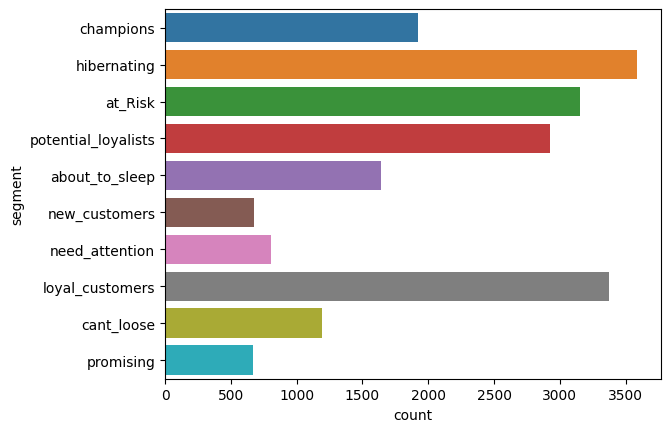

In [12]:
sns.countplot(y ='segment', data = rfm)
plt.show()

# Target Group

In [13]:
filtered_customers = rfm[
    ((rfm["segment"] == "champions") | (rfm["segment"] == "loyal_customers")) &
    (df["interested_in_categories_12"].astype(str).str.contains("KADIN", na=False))
]
filtered_customers.head()

,master_id,recency,frequency,monetary,r_score,f_score,m_score,RF_SCORE,segment
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5,776.07,5,4,1,54,champions
22,004bec18-9f7a-11e9-a2fc-000d3a38a36f,99,12,684.91,3,5,1,35,loyal_customers
23,004d5204-2037-11ea-87bf-000d3a38a36f,27,8,1170.76,5,5,1,55,champions
25,00534fe4-a6b4-11e9-a2fc-000d3a38a36f,63,16,800.59,4,5,1,45,loyal_customers
31,0067708e-1ec6-11ea-aa32-000d3a38a36f,7,5,397.30,5,4,1,54,champions


In [14]:
discount= rfm[
    (df["interested_in_categories_12"].astype(str).str.contains("ERKEK|COCUK", na=False)) &
    (rfm["segment"].isin(["cant_loose","about_to_sleep","new_customers"])
    )]
discount.head()

,master_id,recency,frequency,monetary,r_score,f_score,m_score,RF_SCORE,segment
8,0018c6aa-ab6c-11e9-a2fc-000d3a38a36f,126,2,317.91,3,1,1,31,about_to_sleep
26,0053a6ea-ad0a-11e9-a2fc-000d3a38a36f,117,3,394.49,3,2,1,32,about_to_sleep
76,00f6c98e-abb5-11e9-a2fc-000d3a38a36f,163,12,2199.80,2,5,1,25,cant_loose
78,00f7553c-5bbb-11ea-b88d-000d3a38a36f,174,12,1754.27,2,5,1,25,cant_loose
80,00fa3c44-748c-11eb-8577-000d3a38a36f,7,2,229.96,5,1,1,51,new_customers
